In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# This file will use data in the give-me-some-credit
df = pd.read_csv('C://Users//22938//Documents//GitHub//PHBS_MLF_2023//Give-Me-Some-Credit//code//cs-training.csv', index_col=0)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
df_fillna = df.fillna(df.mean())
X_train = df_fillna.iloc[:, 1:].values
y_train = df_fillna.iloc[:, 0].values

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

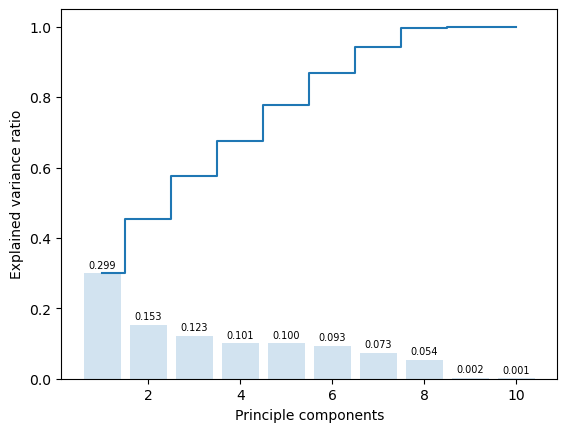

In [4]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)

plt.bar(range(1, X_train.shape[1]+1), pca.explained_variance_ratio_, alpha=0.2, align='center', )
plt.step(range(1, X_train.shape[1]+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.xlabel('Principle components')
plt.ylabel('Explained variance ratio')
for idx, lab in zip(range(1, X_train.shape[1]+1), pca.explained_variance_ratio_):
    plt.text(idx, lab+0.01, '%.3f'% lab, ha='center', va='bottom', fontsize=7)

plt.show()

In [26]:
# Select 6 features to fit

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

pipe_rf = make_pipeline(StandardScaler(),
                       PCA(n_components=6),
                       LogisticRegression())

C = set([10 ** c for c in range(-5, 6)])
C.update(set(range(2, 10, 1)))
C.update(set(range(5, 105, 5)))
C = list(C)
param_grid = [{'logisticregression__C': C}]

gs = GridSearchCV(estimator=pipe_rf,
                 param_grid=param_grid,
                  scoring='accuracy',
                 cv=5,
                 refit=True,
                 n_jobs=-1,
                 verbose=1)

In [27]:
from tqdm import trange
for i in trange(100):
    gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

  0%|          | 0/100 [00:00<?, ?it/s]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


  1%|          | 1/100 [00:42<1:09:41, 42.23s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


  2%|▏         | 2/100 [01:21<1:05:56, 40.37s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


  3%|▎         | 3/100 [01:59<1:03:58, 39.57s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


  4%|▍         | 4/100 [02:38<1:02:38, 39.15s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


  5%|▌         | 5/100 [03:16<1:01:24, 38.78s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


  6%|▌         | 6/100 [03:55<1:00:36, 38.69s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


  7%|▋         | 7/100 [04:32<59:21, 38.29s/it]  

Fitting 5 folds for each of 36 candidates, totalling 180 fits


  8%|▊         | 8/100 [05:10<58:33, 38.19s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


  9%|▉         | 9/100 [05:48<57:50, 38.14s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 10%|█         | 10/100 [06:26<56:55, 37.95s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 11%|█         | 11/100 [07:03<56:03, 37.79s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 12%|█▏        | 12/100 [07:41<55:19, 37.72s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 13%|█▎        | 13/100 [08:19<54:58, 37.91s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 14%|█▍        | 14/100 [08:57<54:12, 37.82s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 15%|█▌        | 15/100 [09:33<53:12, 37.55s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 16%|█▌        | 16/100 [10:11<52:27, 37.47s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 17%|█▋        | 17/100 [10:48<51:47, 37.44s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 18%|█▊        | 18/100 [11:26<51:11, 37.45s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 19%|█▉        | 19/100 [12:03<50:23, 37.33s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 20%|██        | 20/100 [12:40<49:42, 37.28s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 21%|██        | 21/100 [13:17<49:05, 37.28s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 22%|██▏       | 22/100 [13:55<48:34, 37.37s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 23%|██▎       | 23/100 [14:32<47:51, 37.29s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 24%|██▍       | 24/100 [15:09<47:14, 37.30s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 25%|██▌       | 25/100 [15:46<46:34, 37.25s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 26%|██▌       | 26/100 [16:25<46:40, 37.84s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 27%|██▋       | 27/100 [17:05<46:46, 38.44s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 28%|██▊       | 28/100 [17:43<45:53, 38.24s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 29%|██▉       | 29/100 [18:21<45:03, 38.08s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 30%|███       | 30/100 [18:58<44:02, 37.75s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 31%|███       | 31/100 [19:35<43:11, 37.56s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 32%|███▏      | 32/100 [20:12<42:31, 37.53s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 33%|███▎      | 33/100 [20:50<41:53, 37.52s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 34%|███▍      | 34/100 [21:27<41:19, 37.57s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 35%|███▌      | 35/100 [22:05<40:42, 37.58s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 36%|███▌      | 36/100 [22:42<39:53, 37.40s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 37%|███▋      | 37/100 [23:19<39:14, 37.38s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 38%|███▊      | 38/100 [23:56<38:32, 37.30s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 39%|███▉      | 39/100 [24:34<37:50, 37.22s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 40%|████      | 40/100 [25:11<37:13, 37.23s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 41%|████      | 41/100 [25:48<36:44, 37.37s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 42%|████▏     | 42/100 [26:25<36:00, 37.25s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 43%|████▎     | 43/100 [27:03<35:25, 37.29s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 44%|████▍     | 44/100 [27:40<34:51, 37.35s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 45%|████▌     | 45/100 [28:17<34:08, 37.24s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 46%|████▌     | 46/100 [28:55<33:31, 37.26s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 47%|████▋     | 47/100 [29:32<32:53, 37.23s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 48%|████▊     | 48/100 [30:09<32:10, 37.13s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 49%|████▉     | 49/100 [30:46<31:34, 37.14s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 50%|█████     | 50/100 [31:23<31:02, 37.26s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 51%|█████     | 51/100 [32:01<30:27, 37.29s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 52%|█████▏    | 52/100 [32:39<29:59, 37.48s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 53%|█████▎    | 53/100 [33:16<29:20, 37.45s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 54%|█████▍    | 54/100 [33:53<28:42, 37.44s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 55%|█████▌    | 55/100 [34:31<28:05, 37.45s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 56%|█████▌    | 56/100 [35:08<27:25, 37.40s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 57%|█████▋    | 57/100 [35:45<26:45, 37.34s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 58%|█████▊    | 58/100 [36:23<26:11, 37.41s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 59%|█████▉    | 59/100 [37:00<25:31, 37.35s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 60%|██████    | 60/100 [37:37<24:52, 37.30s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 61%|██████    | 61/100 [38:15<24:16, 37.35s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 62%|██████▏   | 62/100 [38:52<23:37, 37.29s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 63%|██████▎   | 63/100 [39:29<22:59, 37.29s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 64%|██████▍   | 64/100 [40:07<22:21, 37.27s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 65%|██████▌   | 65/100 [40:44<21:43, 37.25s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 66%|██████▌   | 66/100 [41:21<21:07, 37.27s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 67%|██████▋   | 67/100 [41:58<20:30, 37.29s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 68%|██████▊   | 68/100 [42:36<19:56, 37.39s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 69%|██████▉   | 69/100 [43:14<19:23, 37.54s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 70%|███████   | 70/100 [43:51<18:46, 37.55s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 71%|███████   | 71/100 [44:29<18:07, 37.52s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 72%|███████▏  | 72/100 [45:06<17:25, 37.34s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 73%|███████▎  | 73/100 [45:43<16:50, 37.44s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 74%|███████▍  | 74/100 [46:21<16:16, 37.54s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 75%|███████▌  | 75/100 [46:58<15:35, 37.43s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 76%|███████▌  | 76/100 [47:36<14:58, 37.43s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 77%|███████▋  | 77/100 [48:13<14:21, 37.48s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 78%|███████▊  | 78/100 [48:50<13:41, 37.33s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 79%|███████▉  | 79/100 [49:28<13:03, 37.30s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 80%|████████  | 80/100 [50:05<12:25, 37.27s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 81%|████████  | 81/100 [50:42<11:48, 37.27s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 82%|████████▏ | 82/100 [51:19<11:10, 37.25s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 83%|████████▎ | 83/100 [51:57<10:33, 37.29s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 84%|████████▍ | 84/100 [52:34<09:56, 37.29s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 85%|████████▌ | 85/100 [53:12<09:20, 37.38s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 86%|████████▌ | 86/100 [53:50<08:47, 37.69s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 87%|████████▋ | 87/100 [54:27<08:07, 37.53s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 88%|████████▊ | 88/100 [55:05<07:30, 37.53s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 89%|████████▉ | 89/100 [55:42<06:51, 37.44s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 90%|█████████ | 90/100 [56:19<06:13, 37.36s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 91%|█████████ | 91/100 [56:57<05:37, 37.45s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 92%|█████████▏| 92/100 [57:34<04:58, 37.32s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 93%|█████████▎| 93/100 [58:11<04:20, 37.22s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 94%|█████████▍| 94/100 [58:48<03:43, 37.27s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 95%|█████████▌| 95/100 [59:25<03:06, 37.22s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 96%|█████████▌| 96/100 [1:00:03<02:29, 37.28s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 97%|█████████▋| 97/100 [1:00:40<01:51, 37.31s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 98%|█████████▊| 98/100 [1:01:17<01:14, 37.24s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 99%|█████████▉| 99/100 [1:01:54<00:37, 37.20s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


100%|██████████| 100/100 [1:02:32<00:00, 37.52s/it]

0.9333266666666666
{'logisticregression__C': 0.0001}


In [31]:
print('Best parameter(C) is %.5f, acc is %.3f' % (gs.best_params_['logisticregression__C'], gs.best_score_))

Best parameter(C) is 0.00010, acc is 0.933
